In [1]:
!ls ../videos/dfdc_train_part_48

aaferzprat.mp4	exnxonosso.mp4	kdioikogxu.mp4	pnpssuckje.mp4	uwaazdihiw.mp4
aafuphyhpt.mp4	exxdugnweb.mp4	kdluiyjesi.mp4	pnpyiohvrh.mp4	uwccodyhgh.mp4
aagundkpoh.mp4	eycfnmrhdt.mp4	kdmonvkpqd.mp4	pnpylbwrxe.mp4	uwhdqtpvfw.mp4
aalkxecnzm.mp4	eycwvdpqbo.mp4	kdowsulnwf.mp4	pnunughkny.mp4	uwhuhyleff.mp4
abbhzhtjru.mp4	eyhhnebwcs.mp4	kdwmfiatqd.mp4	pomoerfbhi.mp4	uwwqocrypp.mp4
abjqjcvhwe.mp4	eyxjlhkadh.mp4	keafxnhakm.mp4	poymvdmdpq.mp4	uxalgdwabq.mp4
abzkaeazro.mp4	eznfhmennm.mp4	keckgmvewj.mp4	ppbuvsygxv.mp4	uxdilljouv.mp4
acanmekatk.mp4	ezrfihipbi.mp4	kefrpktrjt.mp4	ppdmldrwmq.mp4	uxlrcicjge.mp4
acesusftoa.mp4	famavifufv.mp4	kfekgfhthe.mp4	pprgcdyzbr.mp4	uxnxhvsyoi.mp4
acfaxepklq.mp4	fapazklyby.mp4	kfmucuxvhe.mp4	pprjttaplj.mp4	uxpimdnggv.mp4
acvfwpmvrw.mp4	fashimyayn.mp4	kfnjscqwpr.mp4	ppwpmbboyj.mp4	uxzxaahtob.mp4
adbseuwqjt.mp4	fassenuwad.mp4	kfxemywbfk.mp4	pqcmvupjkq.mp4	uydlsvuore.mp4
adlbyccevz.mp4	fasyguwpmg.mp4	kfzuekxbbb.mp4	pqetdjqyji.mp4	uyhkwtjbwb.mp4
adrcjenxlz.mp4	favrjgshqi

In [1]:
import cv2
from matplotlib import pyplot as plt 
from PIL import Image, ImageDraw

In [67]:
dfdc_train_part_48 = '../videos/dfdc_train_part_48'
onefile = 'arjdbfrxvu'


In [68]:
filename = dfdc_train_part_48 + '/' + onefile + '.mp4'

v_cap = cv2.VideoCapture(filename)
print('Frames:', int(v_cap.get(cv2.CAP_PROP_FRAME_COUNT)))

imgs = []

for i in range(4):
    v_cap.set(1,10*i)
    ret, frame = v_cap.read() # Read the frame
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    height, width, channels = frame.shape
    print(height, width, channels)
    imgs.append(frame)
    
v_cap.release()
print(len(imgs))

Frames: 300
1080 1920 3
1080 1920 3
1080 1920 3
1080 1920 3
4


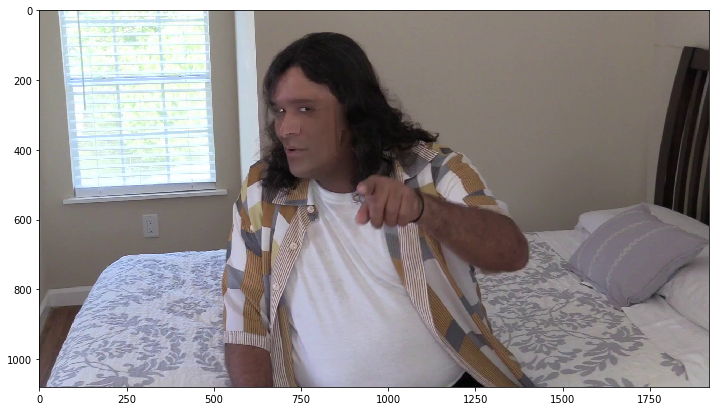

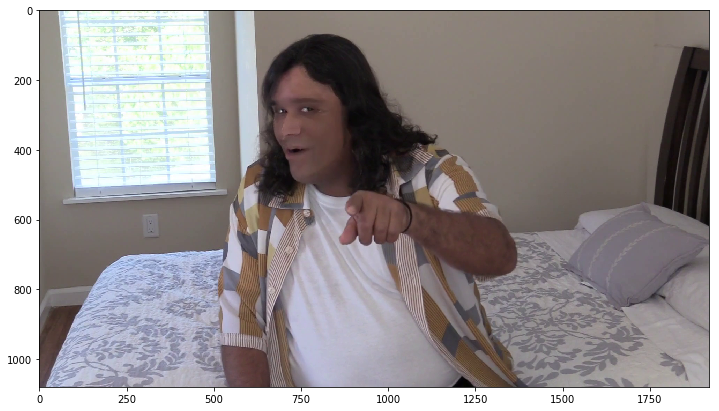

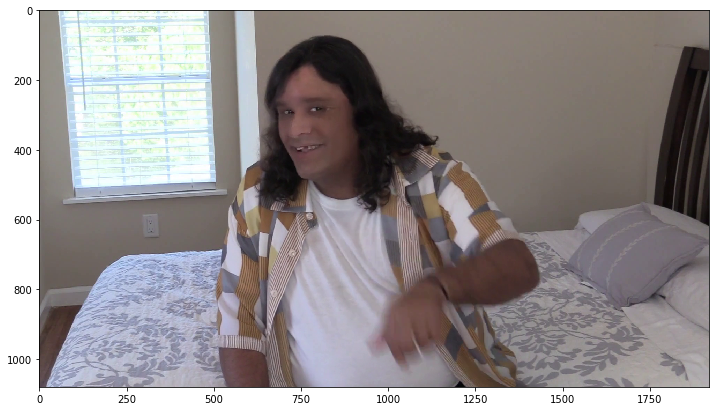

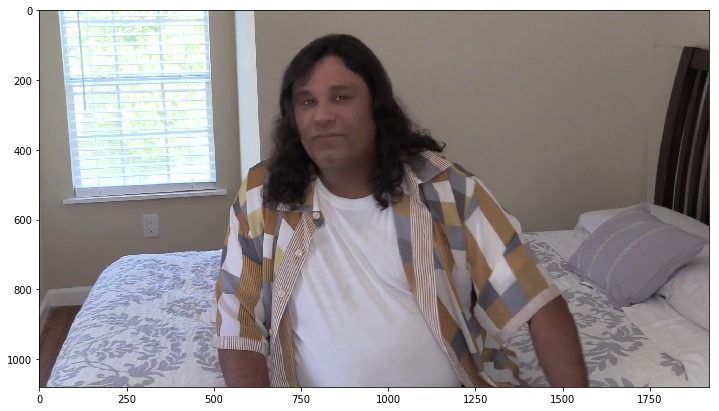

In [69]:
for img in imgs:
    fig, ax = plt.subplots(1,1, figsize=(12,12))
    ax.imshow(img)


In [42]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')


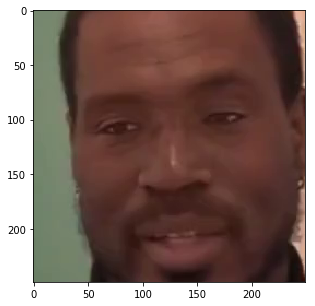

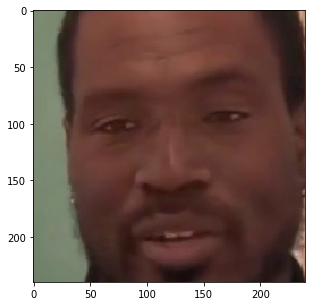

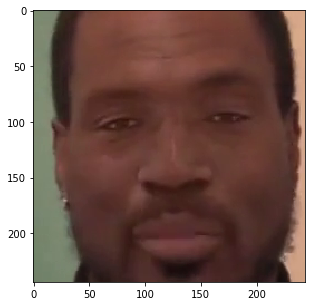

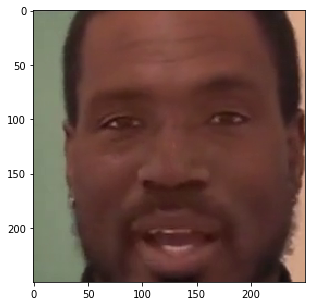

In [43]:
for img in imgs:
    gr = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(
        gr,
        scaleFactor=1.2,
        minNeighbors=5,
        minSize=(150, 150)
    )

    for (x, y, w, h) in faces:
        crop = img[y: y + h, x: x + w] 
        fig, ax = plt.subplots(1,1, figsize=(5,5))
        ax.imshow(crop)

In [44]:
v_cap = cv2.VideoCapture(filename)
out = cv2.VideoWriter('faces_' + onefile + '.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (256,256))
 
while(True):
    ret, frame = v_cap.read()
        
    if ret == True: 
        # Write the frame into the file 'output.avi'
        gr = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(
            gr,
            scaleFactor=1.2,
            minNeighbors=5,
            minSize=(200, 200)
        )
        for (x, y, w, h) in faces:
            crop = frame[y: y + h, x: x + w] 
            crop = cv2.resize(crop, (256, 256), interpolation = cv2.INTER_AREA)
            out.write(crop) 
        
    # Break the loop
    else:
        break 
 
# When everything done, release the video capture and video write objects
v_cap.release()
out.release()
 
# Closes all the frames
cv2.destroyAllWindows() 
